<a href="https://colab.research.google.com/github/monabadr1/monabadr1/blob/main/Diamond_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**



**NumPy** :
Used for numerical computations and handling arrays, vectors, and mathematical operations efficiently.

**Pandas** :
Used for data loading, cleaning, manipulation, and analysis using DataFrames and Series.

**Matplotlib** :
Used for creating basic visualizations such as line plots, scatter plots, and histograms.

**Seaborn** :
Built on top of Matplotlib; used for advanced and visually appealing statistical data visualizations.

**Linear Regression** :
A machine learning model used to predict continuous values by modeling the relationship between features and a target variable.

**Train-Test Split** :
Used to split the dataset into training and testing sets to evaluate model performance.

**Evaluation Metrics** :
Used to measure the performance of regression models:

**MSE**: Measures average squared errors

**MAE**: Measures average absolute errors

**R² Score**: Measures how well the model explains the variance in the data

**XGBoost** :
An advanced gradient boosting algorithm used for building high-performance regression and classification models



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import xgboost as xgb



# **Explore**

The dataset was initially explored using functions such as head(), info(), describe(), sum(), and isnull() to understand its structure, verify data types, and ensure data completeness.
Missing values and inconsistencies were checked to confirm that the data was clean and suitable for analysis and modeling.

In [5]:
diamond_dataset=pd.read_csv('diamonds.csv')

In [6]:
diamond_dataset.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


The diamond dataset is relativaly clean with minimal preproceesing requid

In [7]:
diamond_dataset.isnull().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [8]:
diamond_dataset.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
53935,False
53936,False
53937,False
53938,False


In [9]:
diamond_dataset.carat

,carat
0,0.23
1,0.21
2,0.23
3,0.29
4,0.31
...,...
53935,0.72
53936,0.72
53937,0.70
53938,0.86


In [10]:
(diamond_dataset['carat']==0).sum()

np.int64(0)

# Visualization

Data visualization was performed using Matplotlib and Seaborn to better understand data patterns, distributions, and relationships between variables.


<Axes: xlabel='price', ylabel='Count'>

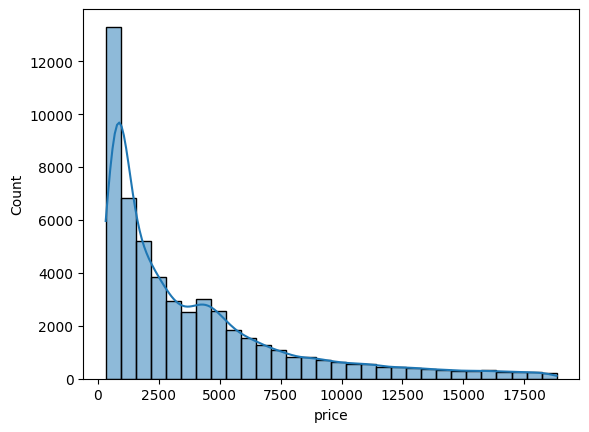

In [11]:
sns.histplot(diamond_dataset['price'],bins=30, kde=True)


<Axes: xlabel='carat', ylabel='price'>

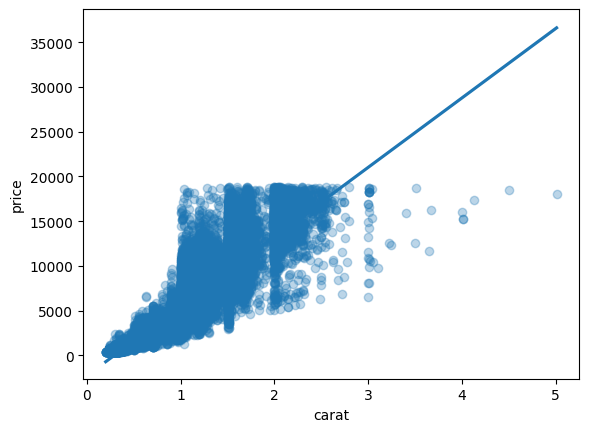

In [12]:
sns.regplot(x='carat', y='price', data=diamond_dataset, scatter_kws={'alpha':0.3})


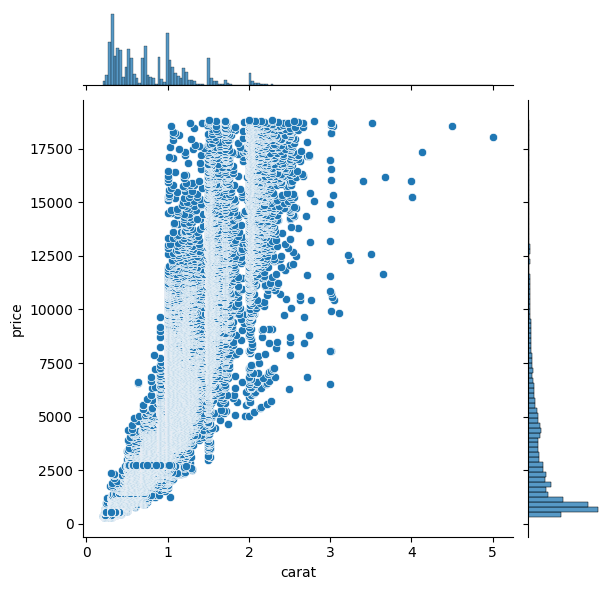

In [13]:
sns.jointplot(x='carat', y='price', data=diamond_dataset, kind='scatter')


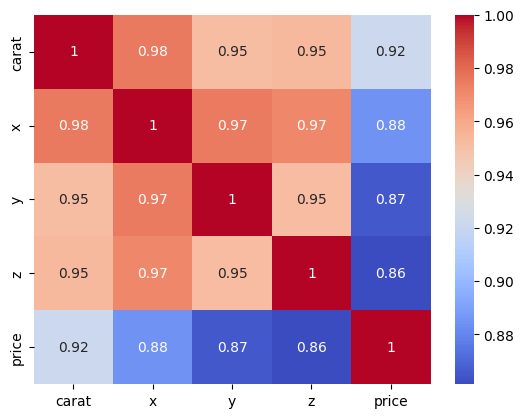

In [14]:
corr = diamond_dataset[['carat','x','y','z','price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


# Linear Regression

Categorical features were converted into numerical values using LabelEncoder to make the data suitable for machine learning models.
A Linear Regression model was applied to learn the relationship between input features and the target

In [15]:
from sklearn.preprocessing import LabelEncoder

for col in ['cut','color','clarity']:
    le = LabelEncoder()
    diamond_dataset[col] = le.fit_transform(diamond_dataset[col])

In [16]:
X = diamond_dataset.drop('price', axis=1)
y = diamond_dataset['price']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

# XGBRegressor

XGBRegressor was used as an advanced machine learning model based on gradient boosting to predict continuous target values.
It builds an ensemble of decision trees sequentially, where each new tree corrects the errors of the previous ones, leading to improved accuracy and robust performance.

In [19]:
xg_reg = xgb.XGBRegressor(
    objective ='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

# Evaluation


1. XGBoost Regressor significantly outperforms Linear Regression
across all evaluation metrics.

2. The much lower MAE, MSE, and RMSE values indicate that XGBoost produces far more accurate predictions.




1. The R² score of XGBoost (≈ 0.9998) shows an almost perfect fit to the data, while Linear Regression explains about 88.8% of the variance.

2. This performance difference suggests that the relationship between features and target variable is non-linear, which XGBoost can model effectively, unlike Linear Regression.















In [20]:
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)



MAE: 865.9385101283315
MSE: 1778835.1247132302
RMSE: 1333.7297794955432
R² Score: 0.8877825513640047


In [21]:
y_pred = xg_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 26.31427764892578
MSE: 2761.14599609375
RMSE: 52.54660784573777
R² Score: 0.9998258352279663
